**Churn** : Business Turnover

In [118]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [119]:
df=pd.read_csv('/content/Churn_Modelling.csv')

In [120]:
df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8916,8917,15665378,Shen,499,France,Female,46,6,0.00,2,1,0,73457.55,0
8343,8344,15591698,P'eng,849,Germany,Female,49,9,132934.89,1,1,0,171056.65,1
3039,3040,15666141,Baldwin,829,Spain,Female,26,8,101440.36,2,1,1,19324.50,0
6658,6659,15777873,Downer,628,France,Female,31,5,0.00,1,0,0,147963.07,1
8606,8607,15694581,Rawlings,807,Spain,Male,42,5,0.00,2,1,1,74900.90,0
5360,5361,15661349,Perkins,633,France,Male,35,10,0.00,2,1,0,65675.47,0
2688,2689,15728474,Chienezie,558,Germany,Male,32,4,108235.91,1,1,1,143783.28,0
1223,1224,15654229,O'Neill,699,Spain,Male,47,1,0.00,2,0,1,30117.44,0
6437,6438,15725094,Fang,623,France,Female,37,4,140211.88,1,1,1,93832.33,0
8089,8090,15623357,Onio,692,Germany,Male,24,2,120596.93,1,0,1,180490.53,0


In [121]:
df.drop(['RowNumber','CustomerId','Surname'], axis='columns',inplace=True)

In [122]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [123]:
df.dtypes

,0
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64


In [124]:
tenure_churn_yes= df[df.Exited==1].Tenure
tenure_churn_no= df[df.Exited==0].Tenure

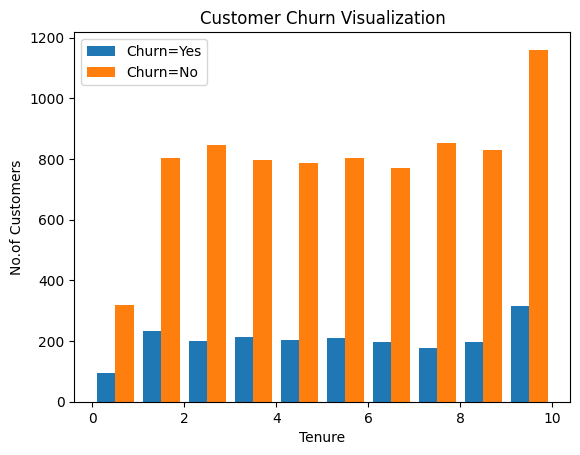

In [125]:
plt.title('Customer Churn Visualization')
plt.xlabel('Tenure')
plt.ylabel('No.of Customers')

plt.hist([tenure_churn_yes,tenure_churn_no],label=['Churn=Yes','Churn=No'])
plt.legend()

In [126]:
balance_churn_yes= df[df.Exited==1].Balance
balance_churn_no= df[df.Exited==0].Balance

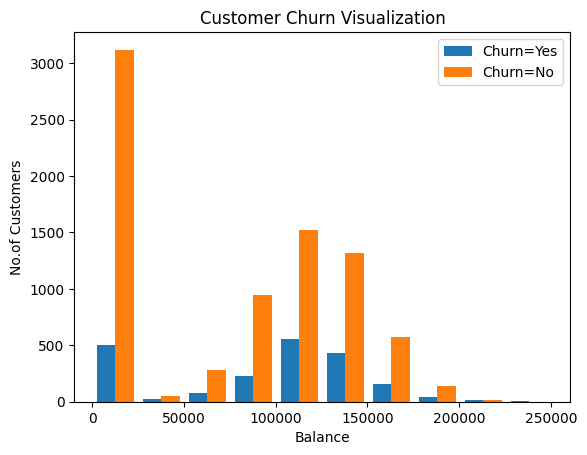

In [127]:
plt.title('Customer Churn Visualization')
plt.xlabel('Balance')
plt.ylabel('No.of Customers')

plt.hist([balance_churn_yes,balance_churn_no],label=['Churn=Yes','Churn=No'])
plt.legend()

In [128]:
def unique_columns(df):
  for column in df:
    if df[column].dtype == 'object':
      print(f'{column} ({len(df[column].unique())}) : {df[column].unique()}')

In [129]:
unique_columns(df)

Geography (3) : ['France' 'Spain' 'Germany']
Gender (2) : ['Female' 'Male']


In [130]:
df['Gender'].replace({'Female':1,'Male':0}, inplace=True)

In [131]:
unique_columns(df)

Geography (3) : ['France' 'Spain' 'Germany']


In [132]:
df2 = pd.get_dummies(data=df, columns=['Geography'])

dummy_columns = df2.filter(like='Geography').columns
df2[dummy_columns] = df2[dummy_columns].astype(int)

In [133]:
df2.dtypes

,0
CreditScore,int64
Gender,int64
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64
Exited,int64


In [134]:
df2.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
4278,759,0,30,4,101802.67,1,0,0,8693.80,0,0,1,0
195,807,0,35,3,174790.15,1,1,1,600.36,0,1,0,0
9565,582,1,38,9,135979.01,4,1,1,76582.95,1,1,0,0
4626,506,1,32,3,0.00,1,1,1,80823.02,0,1,0,0
8452,744,1,46,1,0.00,3,1,1,177431.59,1,0,0,1


In [135]:
colums_to_scale=['CreditScore','Balance','EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
df2[colums_to_scale]= scalar.fit_transform(df2[colums_to_scale])

In [136]:
df2.sample(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
7509,0.390,0,37,9,0.381944,2,0,1,0.524677,0,0,1,0
4339,0.418,1,43,1,0.000000,2,1,1,0.983265,0,1,0,0
2864,0.716,0,37,8,0.611269,1,1,1,0.134517,0,0,1,0
5854,0.262,1,34,5,0.000000,2,1,1,0.626269,0,1,0,0
4370,0.750,0,39,4,0.640310,2,1,0,0.288187,0,1,0,0
4977,0.852,0,35,8,0.423938,1,1,1,0.742651,0,0,0,1
3957,0.614,1,38,5,0.493310,1,0,0,0.235063,1,0,1,0
8636,0.502,0,46,2,0.397716,1,1,1,0.163377,1,1,0,0
5007,0.408,1,46,7,0.349159,3,0,1,0.484635,1,0,0,1
7465,0.632,0,30,3,0.439036,1,0,1,0.374225,0,0,1,0


In [137]:
X=df2.drop('Exited',axis='columns')
y=df2['Exited']

In [138]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=5)

In [139]:
X_train.shape

(8000, 12)

In [140]:
X_test.shape

(2000, 12)

In [141]:
y_train.shape

(8000,)

In [142]:
y_test.shape

(2000,)

In [143]:
len(X_train.columns)

12

In [144]:
import tensorflow as tf
from tensorflow import keras

model= keras.Sequential([
    keras.layers.Dense(12, input_shape=(12,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [145]:
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7826 - loss: 2.2007
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7720 - loss: 0.5395
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8008 - loss: 0.4819
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8073 - loss: 0.4629
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8129 - loss: 0.4499


In [146]:
model.evaluate(X_test,y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8127 - loss: 0.4433  


[0.44547250866889954, 0.8159999847412109]

In [147]:
yp=model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [148]:
ypredict= [1 if x > 0.5 else 0 for x in yp]

In [149]:
ypredict[:5]

[0, 0, 0, 0, 0]

In [152]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,ypredict))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      1595
           1       0.67      0.18      0.28       405

    accuracy                           0.82      2000
   macro avg       0.75      0.58      0.59      2000
weighted avg       0.79      0.82      0.77      2000



Text(95.72222222222221, 0.5, 'Truth')

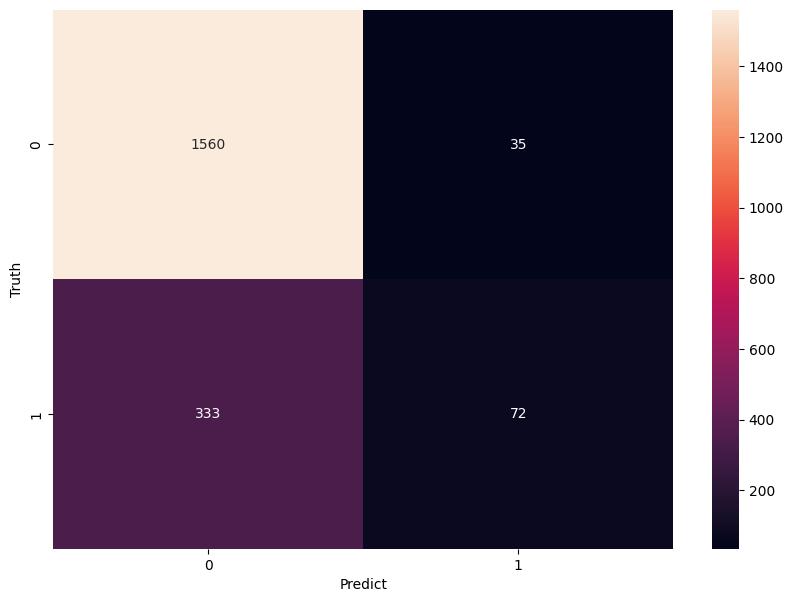

In [154]:
import seaborn as sn
cm= tf.math.confusion_matrix(labels=y_test,predictions=ypredict)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predict')
plt.ylabel('Truth')

In [155]:
round(((1560+72)/(333+1560+72+35)),2)

0.82

**O Precision**

In [161]:
round(1560/(1560+333),2)

0.82

**1 Precision**

In [160]:
round(72/(35+72),2)

0.67

In [162]:
round(1560/(1560+35),2)

0.98

In [163]:
round(72/(333+72),2)

0.18